In [1]:
import sys
sys.path.append('../')

In [2]:
from scripts.utils import data_path, set_mpl
from scripts.cross_match_scripts import fits_to_pandas, pandas_to_fits
import pandas as pd
import numpy as np
import seaborn as sns
from astropy.coordinates import SkyCoord
import astropy.coordinates 
import astropy.units as u

%matplotlib inline

In [3]:
#sdds_dr16_q = fits_to_pandas('SDSS_DR16Q_v4.fits')
#desi_cat[['RA_fin', 'DEC_fin']].describe().loc[['min', 'max']] #fv 154.76<RA<167.09 && 54.12<DEC<61.24
#sdds_dr16_q_LH = sdds_dr16_q.query('RA>154.76 & RA<167.09 & DEC>54.12 & DEC<61.24')
#sdds_dr16_q_LH.to_pickle(data_path+'SDSS_DR16Q_v4_LH.pkl')
sdds_dr16_q_LH = pd.read_pickle(data_path+'SDSS_DR16Q_v4_LH.pkl')
sdds_dr16_q_LH.reset_index(drop=True, inplace=True)
sdds_dr16_q_LH.head(10)

,CATALOG,SDSS_NAME,RA,DEC,PLATE,MJD,FIBERID,AUTOCLASS_PQN,AUTOCLASS_DR14Q,IS_QSO_QN,Z_QN,RANDOM_SELECT,Z_10K,Z_CONF_10K,PIPE_CORR_10K,IS_QSO_10K,THING_ID,Z_VI,Z_CONF,CLASS_PERSON,Z_DR12Q,IS_QSO_DR12Q,Z_DR7Q_SCH,IS_QSO_DR7Q,Z_DR6Q_HW,Z_DR7Q_HW,IS_QSO_FINAL,Z,SOURCE_Z,Z_PIPE,ZWARNING,OBJID,Z_PCA,ZWARN_PCA,DELTACHI2_PCA,Z_HALPHA,ZWARN_HALPHA,DELTACHI2_HALPHA,Z_HBETA,ZWARN_HBETA,DELTACHI2_HBETA,Z_MGII,ZWARN_MGII,DELTACHI2_MGII,Z_CIII,ZWARN_CIII,DELTACHI2_CIII,Z_CIV,ZWARN_CIV,DELTACHI2_CIV,Z_LYA,ZWARN_LYA,DELTACHI2_LYA,Z_LYAWG,BAL_PROB,BI_CIV,ERR_BI_CIV,AI_CIV,ERR_AI_CIV,BI_SIIV,ERR_BI_SIIV,AI_SIIV,ERR_AI_SIIV,BOSS_TARGET1,EBOSS_TARGET0,EBOSS_TARGET1,EBOSS_TARGET2,ANCILLARY_TARGET1,ANCILLARY_TARGET2,NSPEC_SDSS,NSPEC_BOSS,NSPEC,SKYVERSION,RUN_NUMBER,RERUN_NUMBER,CAMCOL_NUMBER,FIELD_NUMBER,ID_NUMBER,LAMBDA_EFF,ZOFFSET,XFOCAL,YFOCAL,CHUNK,TILE,PLATESN2,M_I,SN_MEDIAN_ALL,GALEX_MATCHED,FUV,FUV_IVAR,NUV,NUV_IVAR,UKIDSS_MATCHED,YFLUX,YFLUX_ERR,JFLUX,JFLUX_ERR,HFLUX,HFLUX_ERR,KFLUX,KFLUX_ERR,W1_FLUX,W1_FLUX_IVAR,W1_MAG,W1_MAG_ERR,W1_CHI2,W1_FLUX_SNR,W1_SRC_FRAC,W1_EXT_FLUX,W1_EXT_FRAC,W1_NPIX,W2_FLUX,W2_FLUX_IVAR,W2_MAG,W2_MAG_ERR,W2_CHI2,W2_FLUX_SNR,W2_SRC_FRAC,W2_EXT_FLUX,W2_EXT_FRAC,W2_NPIX,FIRST_MATCHED,FIRST_FLUX,FIRST_SNR,SDSS2FIRST_SEP,JMAG,JMAG_ERR,JSNR,JRDFLAG,HMAG,HMAG_ERR,HSNR,HRDFLAG,KMAG,KMAG_ERR,KSNR,KRDFLAG,SDSS2MASS_SEP,2RXS_ID,2RXS_RA,2RXS_DEC,2RXS_SRC_FLUX,2RXS_SRC_FLUX_ERR,SDSS2ROSAT_SEP,XMM_SRC_ID,XMM_RA,XMM_DEC,XMM_SOFT_FLUX,XMM_SOFT_FLUX_ERR,XMM_HARD_FLUX,XMM_HARD_FLUX_ERR,XMM_TOTAL_FLUX,XMM_TOTAL_FLUX_ERR,XMM_TOTAL_LUM,SDSS2XMM_SEP,GAIA_MATCHED,GAIA_DESIGNATION,GAIA_RA,GAIA_DEC,GAIA_PARALLAX,GAIA_PARALLAX_ERR,GAIA_PM_RA,GAIA_PM_RA_ERR,GAIA_PM_DEC,GAIA_PM_DEC_ERR,GAIA_G_MAG,GAIA_G_FLUX_SNR,GAIA_BP_MAG,GAIA_BP_FLUX_SNR,GAIA_RP_MAG,GAIA_RP_FLUX_SNR,SDSS2GAIA_SEP
0,297381,b'101902.92+563016.4',154.762176,56.504558,8186,57452,424,b'QSO',b'QSO',1,0.948912,0,-1.0,-1,-1,-1,514041046,-1.000,0,0,-1.000000,0,-1.0,-1,-1.0,-1.0,1,0.949672,b'PIPE',0.949672,0,b'1237658303814435106',0.949640,0,1566.986292,-1.0,7682,0.0,0.944766,0,41.486968,0.949606,0,217.798986,0.926423,0,37.568488,-1.000000,7682,0.000000,-1.000000,7682,0.000000,0.949639,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.000000,-1.000000,0,0,1024,0,0,0,0,1,1,2,2987,b'301',4,44,290,5400.0,0.0,-212.864288,-131.953308,b'eboss4',16647,15.197300,-23.173157,2.828909,1,-0.264620,1.631389,1.045455,8.026475,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,129.829941,0.006160,17.216562,0.106555,0.702705,10.189486,0.845354,1.708352,0.013158,36,331.018524,0.000470,16.200369,0.151259,0.734183,7.177998,0.852047,1.223960e+00,0.003698,36,0,-1.00,-1.000000,-1.00000,-1.0,-1.0,-1.0,-1,-1.0,-1.0,-1.0,-1,-1.0,-1.0,-1.0,-1,-1.0,b'-1',-1.0,-1.0,-1.0,-1.0,-1.0,-1,-1.000000,-1.000000,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.0,-1.00000,0,b'-1',-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
1,297392,b'101903.49+565453.3',154.764559,56.914829,7086,56658,182,b'QSO',b'QSO',1,1.937857,0,-1.0,-1,-1,-1,515153254,1.939,3,30,1.939000,1,-1.0,-1,-1.0,-1.0,1,1.939000,b'VI',1.943660,0,b'1237655108907827398',1.943448,0,1308.513578,-1.0,7682,0.0,-1.000000,7682,0.000000,1.937605,0,66.383359,1.912433,0,119.726773,1.928514,0,1029.558284,2.013538,2050,18.875026,1.943323,1.0,78.037552,1.929666,2064.622803,12.263460,0.0,0.0,601.909912,14.974689,2199023779840,0,0,0,0,0,0,0,0,2,2243,b'301',5,230,198,4000.0,0.0,31.801363,-90.111717,b'boss34',15600,24.241199,-25.095243,2.749404,1,-0.217449,172.113936,0.097800,41.710783,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,109.425697,0.006789,17.402203,0.120417,0.499276,9.016505,0.842367,6.407395,0.058555,33,212.564697,0.000511,16.681273,0.226013,0.427844,4.803863,0.853143,1.043046e+01,0.049070,35,0,-1.00,-1.000000,-1.00000,-1.0,-1.0,-1.0,-1,-1.0,-1.0,-1.0,-1,-1.0,-1.0,-1.0,-1,-1.0,b'-1',-1.0,-1.0,-1.0,-1.0,-1.0,-1,-1.000000,-1.0000

In [4]:
desi_cat = pd.read_pickle(data_path+'ERO_lhpv_03_23_sd01_a15_g14_desi_nway_match.gz_pkl', compression='gzip')
desi_cat.reset_index(drop=True, inplace=True)
desi_cat.head(10)

,srcname_fin,RA_fin,DEC_fin,GLON,GLAT,pos_r98,DET_LIKE_0,ML_FLUX_0,ML_FLUX_ERR_0,ML_CTS_0,ML_CTS_ERR_0,ML_EXP_1,EXT,EXT_LIKE,EXT_ERR,ID_SRC,ID_CLUSTER,RA,DEC,RADEC_ERR,DIST_NN,SRCDENS,TSTART,TSTOP,EXT_LOWERR,EXT_UPERR,ML_RATE_0,ML_RATE_ERR_0,ML_BKG_0,RA_corr,DEC_corr,g_id,g_d2d,g_nsrc,g_s,g_gmag,g_maxLx,g_b,s_id,s_z,s_otype,s_d2d,s_nsrc,flag_xray,flag_radio,flag_agn_wise,w1,w2,w3,w1snr,w2snr,w3snr,w_nsrc,sdss_nsrc,sdss_p,sdss_id,sdss_sp,sdss_d2d,hpidx,RADEC_ERR_fin,pos_sigma_2d,pos_r68,pos_r95,ELON,ELAT,flux_05-20,NH,nway_desi_id,nway_Separation_EROSITA_DESI,nway_prob_has_match,nway_prob_this_match,nway_nnmag_grzw1w2w3w4,nway_nnmag_grzw1w2,nway_nnmag_grz,nway_n_match_flag_0,nway_n_match_flag_2,nway_is_duplicated,nway_is_confused,desi_release,desi_objid,desi_brickid,desi_ra,desi_dec,desi_flux_g,desi_flux_r,desi_flux_z,desi_flux_w1,desi_flux_w2,desi_flux_w3,desi_flux_w4,desi_flux_ivar_g,desi_flux_ivar_r,desi_flux_ivar_z,desi_flux_ivar_w1,desi_flux_ivar_w2,desi_flux_ivar_w3,desi_flux_ivar_w4,desi_dered_mag_g,desi_dered_mag_r,desi_dered_mag_z,desi_dered_mag_w1,desi_dered_mag_w2,desi_dered_mag_w3,desi_dered_mag_w4
0,SRGe J101903.3+563020,154.763934,56.505585,154.966043,50.066118,9.267930,15.858959,2.171120e-14,5.650445e-15,28.800014,7.495345,1211.871216,0.0,0.0,0.0,6207,5146,154.765943,56.504295,4.058504,102.778427,0.000023,6.268413e+08,6.270701e+08,0.0,0.0,0.023765,0.006185,7.077317,154.763934,56.505585,853324209744036352,7.576342,1,0,20.950485,-1.0,0,SDSS J101902.92+563016.4,0.949746,QSO,7.576898,1,0,0,2,16.915001,16.554001,12.382,12.1,5.0,0.7,2,1,1,1237658303814435106,9216733310671409152,7.544174,68469189470,4.058504,3.313348,5.001804,8.110237,132.352465,42.185604,1.670761e-14,1.526396e+20,9011_606779_231,5.167984,0.983660,0.983020,-99.000000,0.973052,0.887623,14,0,False,False,9011,231,606779,154.762154,56.504538,3.362170,4.618722,5.989522,16.031805,20.984790,50.180990,-3.493270,435.342250,248.158630,104.400180,3.761635,0.939089,0.001432,0.000018,21.087423,20.774010,20.520338,19.482046,19.191862,18.247932,NaN
1,SRGe J101903.4+563325,154.764302,56.556994,154.897407,50.039645,12.232697,16.660557,2.758328e-14,6.850312e-15,34.209091,8.495835,1133.034668,0.0,0.0,0.0,4806,3902,154.766311,56.555705,5.407337,163.025894,0.000029,6.268413e+08,6.270701e+08,0.0,0.0,0.030192,0.007498,6.562579,154.764302,56.556994,-1,-1.000000,0,-1,NaN,-1.0,-1,SDSS J101904.67+563333.2,1.464000,QSO,13.943999,1,0,0,-1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,-1,0,0,NaN,68265812198,5.407337,4.373272,6.601858,10.704663,132.318989,42.230639,2.122641e-14,1.507868e+20,9011_606779_284,12.929691,0.606908,0.872974,0.961661,0.975168,0.823176,9,0,False,False,9011,284,606779,154.769507,56.559155,4.110681,6.741001,7.775545,18.952187,29.332830,65.296720,371.384800,259.819270,99.752320,72.978060,3.654050,0.866400,0.001278,0.000015,20.872555,20.365770,20.238258,19.300547,18.828358,17.962076,16.075178
2,SRGe J101911.0+562639,154.795822,56.444182,155.033709,50.112976,7.855049,18.953989,1.654359e-14,3.709296e-15,40.391277,9.056271,2230.516357,0.0,0.0,0.0,4530,3655,154.797830,56.442893,3.409649,142.069946,0.000015,6.268413e+08,6.270701e+08,0.0,0.0,0.018108,0.004060,12.856621,154.795822,56.444182,-1,-1.000000,0,-1,NaN,-1.0,-1,NaN,NaN,NaN,-1.000000,0,0,0,-1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,-1,0,0,NaN,68713641563,3.409649,2.808233,4.239287,6.873844,132.413453,42.140474,1.273093e-14,1.537238e+20,9011_606779_455,15.145586,0.000003,0.900838,-99.000000,0.103009,0.213531,7,0,False,False,9011,455,606779,154.798428,56.448135,0.261824,0.279961,0.433191,0.675604,1.692767,-50.740715,326.340500,409.680970,145.013170,117.516495,4.582493,1.061522,0.001434,0.000018,23.850270,23.811726,23.368849,22.919775,21.924826,NaN,16.215527
3,SRGe J101914.3+563109,154.809447,56.519165,154.927665,50.080552,18.357738,9.770685,1.461044e-14,4.307066e-15,28.471239,8.393143,1780.289429,0.0,0.0,0.0,7154,6033,154.811456,56.517875,8.171203,102.778427,0.000021,6.268413e+08,6.270701e+08,0.0,0.0,0.015992,0.004714,10.505683,154.809447,56.5

# Cross match SDSS quasard and DESI


In [5]:
coords_sdss = SkyCoord(ra=sdds_dr16_q_LH['RA']*u.degree, dec=sdds_dr16_q_LH['DEC']*u.degree, frame='icrs')    
coords_desi = SkyCoord(ra=desi_cat['desi_ra']*u.degree, dec=desi_cat['desi_dec']*u.degree, frame='icrs') 
cross_sdss_desi = astropy.coordinates.search_around_sky(coords_desi, coords_sdss, 3*u.arcsec) 
id_desi, id_sdss, ang_sep = cross_sdss_desi[0], cross_sdss_desi[1], cross_sdss_desi[2]

ang_sep = ang_sep.to(u.arcsec)
ang_sep = pd.DataFrame({'Separation_DESI_SDSS': ang_sep})


In [6]:

#desi_cat_sdss_match = pd.concat([desi_cat_ra_dec.loc[id_desi],ang_sep, sdds_dr16_q_LH.loc[id_sdss]], axis=1) 
df1 = desi_cat.loc[id_desi]
df1.reset_index(drop=True, inplace=True)
df2 = sdds_dr16_q_LH.loc[id_sdss]
df2.reset_index(drop=True, inplace=True)
desi_cat_sdss_match = pd.concat([df1,ang_sep, df2], axis=1) 
desi_cat_sdss_match = desi_cat_sdss_match.query("nway_prob_has_match>0.4")

In [7]:
desi_cat_sdss_match.Separation_DESI_SDSS.describe()

count    2013.000000
mean        0.065859
std         0.038311
min         0.001482
25%         0.039155
50%         0.059087
75%         0.085712
max         0.275323
Name: Separation_DESI_SDSS, dtype: float64

In [8]:
desi_cat_sdss_match.query('ML_FLUX_0>1e-14')

,srcname_fin,RA_fin,DEC_fin,GLON,GLAT,pos_r98,DET_LIKE_0,ML_FLUX_0,ML_FLUX_ERR_0,ML_CTS_0,ML_CTS_ERR_0,ML_EXP_1,EXT,EXT_LIKE,EXT_ERR,ID_SRC,ID_CLUSTER,RA,DEC,RADEC_ERR,DIST_NN,SRCDENS,TSTART,TSTOP,EXT_LOWERR,EXT_UPERR,ML_RATE_0,ML_RATE_ERR_0,ML_BKG_0,RA_corr,DEC_corr,g_id,g_d2d,g_nsrc,g_s,g_gmag,g_maxLx,g_b,s_id,s_z,s_otype,s_d2d,s_nsrc,flag_xray,flag_radio,flag_agn_wise,w1,w2,w3,w1snr,w2snr,w3snr,w_nsrc,sdss_nsrc,sdss_p,sdss_id,sdss_sp,sdss_d2d,hpidx,RADEC_ERR_fin,pos_sigma_2d,pos_r68,pos_r95,ELON,ELAT,flux_05-20,NH,nway_desi_id,nway_Separation_EROSITA_DESI,nway_prob_has_match,nway_prob_this_match,nway_nnmag_grzw1w2w3w4,nway_nnmag_grzw1w2,nway_nnmag_grz,nway_n_match_flag_0,nway_n_match_flag_2,nway_is_duplicated,nway_is_confused,desi_release,desi_objid,desi_brickid,desi_ra,desi_dec,desi_flux_g,desi_flux_r,desi_flux_z,desi_flux_w1,desi_flux_w2,desi_flux_w3,desi_flux_w4,desi_flux_ivar_g,desi_flux_ivar_r,desi_flux_ivar_z,desi_flux_ivar_w1,desi_flux_ivar_w2,desi_flux_ivar_w3,desi_flux_ivar_w4,desi_dered_mag_g,desi_dered_mag_r,desi_dered_mag_z,desi_dered_mag_w1,desi_dered_mag_w2,desi_dered_mag_w3,desi_dered_mag_w4,Separation_DESI_SDSS,CATALOG,SDSS_NAME,RA,DEC,PLATE,MJD,FIBERID,AUTOCLASS_PQN,AUTOCLASS_DR14Q,IS_QSO_QN,Z_QN,RANDOM_SELECT,Z_10K,Z_CONF_10K,PIPE_CORR_10K,IS_QSO_10K,THING_ID,Z_VI,Z_CONF,CLASS_PERSON,Z_DR12Q,IS_QSO_DR12Q,Z_DR7Q_SCH,IS_QSO_DR7Q,Z_DR6Q_HW,Z_DR7Q_HW,IS_QSO_FINAL,Z,SOURCE_Z,Z_PIPE,ZWARNING,OBJID,Z_PCA,ZWARN_PCA,DELTACHI2_PCA,Z_HALPHA,ZWARN_HALPHA,DELTACHI2_HALPHA,Z_HBETA,ZWARN_HBETA,DELTACHI2_HBETA,Z_MGII,ZWARN_MGII,DELTACHI2_MGII,Z_CIII,ZWARN_CIII,DELTACHI2_CIII,Z_CIV,ZWARN_CIV,DELTACHI2_CIV,Z_LYA,ZWARN_LYA,DELTACHI2_LYA,Z_LYAWG,BAL_PROB,BI_CIV,ERR_BI_CIV,AI_CIV,ERR_AI_CIV,BI_SIIV,ERR_BI_SIIV,AI_SIIV,ERR_AI_SIIV,BOSS_TARGET1,EBOSS_TARGET0,EBOSS_TARGET1,EBOSS_TARGET2,ANCILLARY_TARGET1,ANCILLARY_TARGET2,NSPEC_SDSS,NSPEC_BOSS,NSPEC,SKYVERSION,RUN_NUMBER,RERUN_NUMBER,CAMCOL_NUMBER,FIELD_NUMBER,ID_NUMBER,LAMBDA_EFF,ZOFFSET,XFOCAL,YFOCAL,CHUNK,TILE,PLATESN2,M_I,SN_MEDIAN_ALL,GALEX_MATCHED,FUV,FUV_IVAR,NUV,NUV_IVAR,UKIDSS_MATCHED,YFLUX,YFLUX_ERR,JFLUX,JFLUX_ERR,HFLUX,HFLUX_ERR,KFLUX,KFLUX_ERR,W1_FLUX,W1_FLUX_IVAR,W1_MAG,W1_MAG_ERR,W1_CHI2,W1_FLUX_SNR,W1_SRC_FRAC,W1_EXT_FLUX,W1_EXT_FRAC,W1_NPIX,W2_FLUX,W2_FLUX_IVAR,W2_MAG,W2_MAG_ERR,W2_CHI2,W2_FLUX_SNR,W2_SRC_FRAC,W2_EXT_FLUX,W2_EXT_FRAC,W2_NPIX,FIRST_MATCHED,FIRST_FLUX,FIRST_SNR,SDSS2FIRST_SEP,JMAG,JMAG_ERR,JSNR,JRDFLAG,HMAG,HMAG_ERR,HSNR,HRDFLAG,KMAG,KMAG_ERR,KSNR,KRDFLAG,SDSS2MASS_SEP,2RXS_ID,2RXS_RA,2RXS_DEC,2RXS_SRC_FLUX,2RXS_SRC_FLUX_ERR,SDSS2ROSAT_SEP,XMM_SRC_ID,XMM_RA,XMM_DEC,XMM_SOFT_FLUX,XMM_SOFT_FLUX_ERR,XMM_HARD_FLUX,XMM_HARD_FLUX_ERR,XMM_TOTAL_FLUX,XMM_TOTAL_FLUX_ERR,XMM_TOTAL_LUM,SDSS2XMM_SEP,GAIA_MATCHED,GAIA_DESIGNATION,GAIA_RA,GAIA_DEC,GAIA_PARALLAX,GAIA_PARALLAX_ERR,GAIA_PM_RA,GAIA_PM_RA_ERR,GAIA_PM_DEC,GAIA_PM_DEC_ERR,GAIA_G_MAG,GAIA_G_FLUX_SNR,GAIA_BP_MAG,GAIA_BP_FLUX_SNR,GAIA_RP_MAG,GAIA_RP_FLUX_SNR,SDSS2GAIA_SEP
0,SRGe J101903.3+563020,154.763934,56.505585,154.966043,50.066118,9.267930,15.858959,2.171120e-14,5.650445e-15,28.800014,7.495345,1211.871216,0.0,0.0,0.0,6207,5146,154.765943,56.504295,4.058504,102.778427,0.000023,6.268413e+08,6.270701e+08,0.0,0.0,0.023765,0.006185,7.077317,154.763934,56.505585,853324209744036352,7.576342,1,0,20.950485,-1.0,0,SDSS J101902.92+563016.4,0.949746,QSO,7.576898,1,0,0,2,16.915001,16.554001,12.382,12.1,5.0,0.7,2,1,1,1237658303814435106,9216733310671409152,7.544174,68469189470,4.058504,3.313348,5.001804,8.110237,132.352465,42.185604,1.670761e-14,1.526396e+20,9011_606779_231,5.167984,0.983660,0.983020,-99.000000,0.973052,0.887623,14,0,False,False,9011,231,606779,154.762154,56.504538,3.362170,4.618722,5.989522,16.031805,20.984790,50.180990,-3.493270,435.34225,248.158630,104.400180,3.761635,0.939089,0.001432,0.000018,21.087423,20.774010,20.520338,19.482046,19.191862,18.247932,NaN,0.082520,297381,b'101902.92+563016.4',154.762176,56.504558,8186,57452,424,b'QSO',b'QSO',1,0.948912,0,-1.0,-1,-1,-1,514041046,-1.000,0,0,-1

In [9]:
#%matplotlib auto
%matplotlib inline
from astropy.cosmology import FlatLambdaCDM
import astropy
cosmo = FlatLambdaCDM(H0 = 73.0,Om0=0.25)

zmin = 0.3
zmax = 4
desi_cat_sdss_match_tmp = desi_cat_sdss_match.query('Z>=@zmin and Z<=@zmax')
ra,dec,redshift = desi_cat_sdss_match_tmp['RA_fin'].values, desi_cat_sdss_match_tmp['DEC_fin'].values, desi_cat_sdss_match_tmp['Z'].values


lumin = 4*np.pi*desi_cat_sdss_match_tmp['ML_FLUX_0'].values*(u.erg/u.s/u.cm**2)*(cosmo.luminosity_distance(redshift))**2
lumin = lumin.to(u.erg/u.s).value

dist = cosmo.comoving_distance(redshift).to(u.Mpc)

coords = SkyCoord(ra=ra*u.degree, dec=dec*u.degree, distance = dist, frame='icrs')
x,y,z = coords.cartesian.x.value, coords.cartesian.y.value, coords.cartesian.z.value

In [10]:
sdss_dr16_galaxies = pd.read_pickle('/Users/sdbykov/work/clustering/data/sdss/dr12_data')
sdss_dr16_galaxies_LH  =sdss_dr16_galaxies.query('RA>154.76 & RA<167.09 & DEC>54.12 & DEC<61.24 & Z>0.01')
sdss_dr16_galaxies_LH = sdss_dr16_galaxies_LH.query("Z<@zmax & Z>@zmin")
sdss_dr16_galaxies_LH



ra_sdss_gal,dec_sdss_gal,redshift_sdss_gal = sdss_dr16_galaxies_LH['RA'].values, sdss_dr16_galaxies_LH['DEC'].values, sdss_dr16_galaxies_LH['Z'].values


dist_sdss_gal = cosmo.comoving_distance(redshift_sdss_gal).to(u.Mpc)

coords_sdss_gal = SkyCoord(ra=ra_sdss_gal*u.degree, dec=dec_sdss_gal*u.degree, distance = dist_sdss_gal, frame='icrs')
x_sdss_gal,y_sdss_gal,z_sdss_gal = coords_sdss_gal.cartesian.x.value, coords_sdss_gal.cartesian.y.value, coords_sdss_gal.cartesian.z.value

MovieWriter imagemagick unavailable; using Pillow instead.


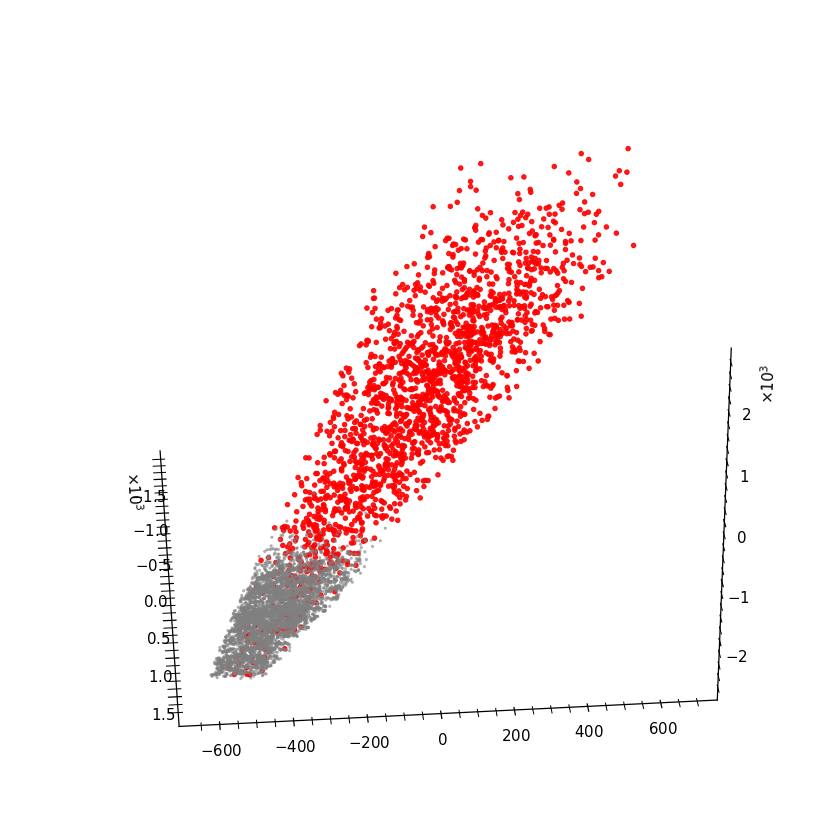

In [11]:
#%matplotlib auto
%matplotlib inline

#make 3d plot of x,y,z for ero and sdss

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')

shift_x = np.mean(x)
shift_y = np.mean(y)
shift_z = np.mean(z)

x = x - shift_x
y = y - shift_y
z = z - shift_z

x_sdss_gal = x_sdss_gal - shift_x
y_sdss_gal = y_sdss_gal - shift_y
z_sdss_gal = z_sdss_gal - shift_z

scat = ax.scatter(x,y,z, '.', color = 'r', alpha = 0.9, s = 20)
scat_gal = ax.scatter(x_sdss_gal,y_sdss_gal,z_sdss_gal, '.', color = 'gray', alpha = 0.5, s = 5)

ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.grid(False)
# Now set color to white (or whatever is "invisible")
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')


from matplotlib import animation
def rotate(angle):
    ax.view_init(azim=angle)
    
rot_animation = animation.FuncAnimation(fig, rotate, frames=np.arange(0,360,5),interval=100)
rot_animation.save('rotation.gif', dpi=80, writer='imagemagick')

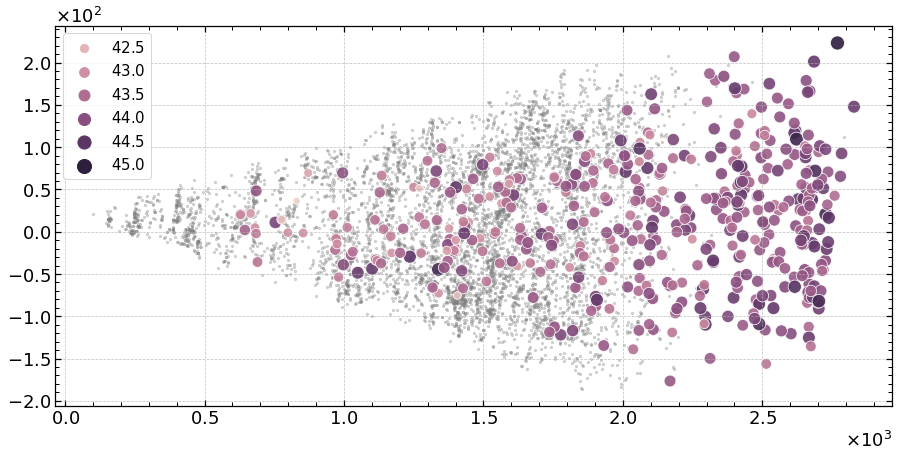

In [113]:
%matplotlib inline
#%matplotlib auto
fig,  ax =  plt.subplots( figsize = (15,7))
#fit x as a linear function of z
x_fit_coef = np.polyfit(z, x, 1)
x_fit = x_fit_coef[0]*z + x_fit_coef[1]

mask=  np.log10(lumin)>30
mask*= (y>0.1e3) & (y<2e3)
#mask *= (redshift>0.5) & (redshift<1.5)
mask *= (redshift<1)# & (redshift<1.5)

z_new = z[mask]
x_new = x[mask] - x_fit[mask]
size_new =  np.log10(lumin[mask])
sns.scatterplot(x = z_new, y = x_new, size = size_new, hue = size_new, alpha = 0.9, ax = ax)

#sns.scatterplot(x = z_sdss_gal, y = x_sdss_gal - (x_fit_coef[1]+x_fit_coef[0]*z_sdss_gal), alpha = 0.3, size = 0.01, color = 'gray', ax = ax, zorder = -1)
x_sdss_gal_new = x_sdss_gal - (x_fit_coef[1]+x_fit_coef[0]*z_sdss_gal)
mask_sdss = (y_sdss_gal>0) & (y_sdss_gal<1e3)
ax.scatter(x = z_sdss_gal, y = x_sdss_gal_new, alpha = 0.3, s = 5, color = 'gray',zorder = -1)
#sns.histplot(x = z_sdss_gal, y = x_sdss_gal - (x_fit_coef[1]+x_fit_coef[0]*z_sdss_gal), ax = ax, zorder = -1,  bins = 250)

plt.show()

In [17]:
x_fit

array([ -0.59463155, -17.28606199])

In [ ]:



#plot 3d scatter plot

# fig = plt.figure(figsize=(12,12))
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(x,y,z, c='b', marker='o', s=10)
# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Z')
# plt.show()



In [ ]:
# from astroquery.sdss import SDSS
# import astropy.units as u
# from astropy import coordinates as coords

# def query_sdss(ra,dec, radius=1):
#     #https://python.hotexamples.com/examples/astroquery.sdss/SDSS/-/python-sdss-class-examples.html#0xe37cb23405b6ae04a75ee7a841535eb09dd84c0515d7c56d3edc487b3bc4b590-11,,18,
#     pos = coords.SkyCoord(ra*u.deg, dec*u.deg, frame='icrs')

#     return SDSS.query_region(pos ,radius=radius*u.arcsec, spectro=True)

# xid = query_sdss(154.762154, 56.504538, radius=2)
# # xid
# from astroquery.sdss import SDSS
# query = """

# SELECT TOP 100
# g,
# run,
# rerun,
# camcol,
# field,
# objID
# FROM Galaxy
# WHERE ( (g <= 22)
# and (u - g >= -0.27)
# and (u - g < 0.71)
# and (g - r >= -0.24)
# and (g - r < 0.35)
# and (r - i >= -0.27)
# and (r - i < 0.57)
# and (i - z >= -0.35)
# and (i - z < 0.70) )
# ORDER BY g
# """
# res = SDSS.query_sql(query)
# res